# SEGUNDA RODADA DE PERGUNTAS

## Revisão da Rodada Anterior

O CEO da A Xtreme Groovy Bikes Sales, que é uma empresa de revenda de motocicletas e tem o seu modelo de nogócio como revenda motocicletas usadas, contratou você como um consultor de ciência de dados para ajud-á-los a encontrar as melhores motos da base de dados que eles adquiriram através de um estudo de mercado.

Na rodada passada foi realizado o estudo da base de dados e respondido algumas perguntas que o CEO fez utilizando a base de dados.

Agora, o CEO fez novas perguntas que devemos responder utilizando essa nova base de dados.


### Descrição das Colunas

| Coluna | Descrição |
| :----- | --------: |
| ID | Identificador da linha/registro |
| name | Fabricante e Modelo da Moto |
| selling_price | Preço de Venda |
| year | Ano de Fabricação da Moto |
| seller_type | Tipo de Vendedor - Se é vendedor pessoal ou revendedor |
| owner | Se é primeiro, segundo, terceiro ou quarto dono da moto |
| km_driven | Quantidade de Quilometros percorrido pela moto |
| ex_showroom_price | Preço da motocicleta sem as taxas de seguro e registro |

## Novas Perguntas

Após analisar as respostas das perguntas anteriores, o CEO da XGB Sales lhe fez mais algumas perguntas:

1. As motos que possuiram somente 1 dono são as motos mais caras na média que as motos que tiveram mais donos?
2. As motos que possuiram mais donos são as motos que possuem quilometragem média maior que as motos que possuiram menos donos?
3. As motos que possuiram mais donos são as motos mais velhas na média?
4. As motos que são vendidas por revendedores são as motos mais caras na média do que as motos vendidas pelos seus donos?
5. O CEO lhe entregou um novo dataset chamado companies.csv, onde estão todas as fabricantes de motocicletas. Adicione uma coluna no DataFrame com o nome de company. Essa coluna deve possuir o nome do fabricante de cada moto do DataFrame.
6. Crie um novo dataset chamado bikes_completed.csv a partir do DataFrame com a coluna company preenchida.
7. Quais são so fabricantes que mais possuem motos cadastradas na base de dados completa?

In [1]:
# Bibliotecas
import seaborn as sns
import pandas as pd
import numpy  as np

from datetime import date

In [2]:
# importar dados
# Dataset limpo da rodada anterior
df = pd.read_csv('C:\\Users\\mlsil\\OneDrive\\Documentos\\repos\\fundamentos_programacao\\csv\\bikes_completed.csv')
df.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,1,3,Royal Enfield
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN,2,5,Honda
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,3,4,Royal Enfield
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,5,7,Yamaha
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,5,11,Yamaha


### Perguntas e respostas

###### 1. As motos que possuem somente 1 dono são as motos mais caras na média que as motos que tiveram mais donos ?

R: Vamos agrupar os dados por categoria de quantidade de donos, coluna 'owner' e tirar a média dos valores de preços de venda para verificarmos qual é a categoria que possui a maior média

In [3]:
df_grouped = df.loc[(df['id'] != 134) & (df['id'] != 311),['owner', 'selling_price']]
df_grouped = df_grouped.groupby('owner')

df_grouped = df_grouped.agg(
    avg_price = pd.NamedAgg('selling_price', 'mean'),
    qty = pd.NamedAgg('owner', 'count'),
).sort_values('avg_price', ascending=False).reset_index()

df_grouped

,owner,avg_price,qty
0,1st owner,60022.813853,924
1,3rd owner,55727.272727,11
2,2nd owner,49975.401639,122
3,4th owner,12500.000000,2


In [4]:
# Arredondando duas casas
df_grouped['avg_price'] = df_grouped['avg_price'].round(2)
df_grouped

,owner,avg_price,qty
0,1st owner,60022.81,924
1,3rd owner,55727.27,11
2,2nd owner,49975.40,122
3,4th owner,12500.00,2


In [5]:
# Procurando o 4th dono das motos
df.loc[df['owner'] == '4th owner', :]

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
311,311,Harley-Davidson Street 750,330000.0,2014,Individual,4th owner,6500,534000.0,2,8,Harley-Davidson
642,642,TVS Apache RTR 160,15000.0,2009,Individual,4th owner,880000,NaN,176,13,TVS
698,698,Hero Honda CBZ,10000.0,2000,Individual,4th owner,48000,NaN,10,22,Hero


In [6]:
# Selecionando 'Harley-Davidson' da coluna 'company'
df.loc[df['company'] == 'Harley-Davidson', :]

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
134,134,Harley-Davidson Street Bob,750000.0,2013,Individual,2nd owner,12000,1278000.0,3,9,Harley-Davidson
311,311,Harley-Davidson Street 750,330000.0,2014,Individual,4th owner,6500,534000.0,2,8,Harley-Davidson


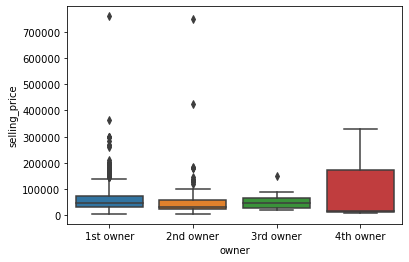

In [7]:
df_selected = df.loc[:, ['owner', 'selling_price']]

sns.boxplot( 
    data = df_selected,
    x = 'owner',
    y = 'selling_price'
);

Como podemos observar, na média, as motos mais caras são as motos que tiveram 4 donos.

###### 2. As motos que possuiram mais donos são as motos que possuem quilometragem média maior que as motos que possuiram menos donos ?

R: Vamos agrupar os dados por categoria de quantidade de donos, coluna 'owner', e vamos calculara média de quilometros percorridos por categoria.

In [8]:
df_grouped = df[['owner', 'km_driven']].groupby('owner')
df_grouped = df_grouped.mean().sort_values('km_driven', ascending=False).reset_index()
df_grouped

,owner,km_driven
0,4th owner,311500.000000
1,2nd owner,39288.991870
2,3rd owner,33292.181818
3,1st owner,32816.583333


In [9]:
df['km_driven'].max()

880000

In [10]:
df.describe()

,id,selling_price,year,km_driven,ex_showroom_price,km_class,age
count,1061.000000,1061.000000,1061.000000,1061.000000,6.260000e+02,1061.000000,1061.000000
mean,530.000000,59638.151744,2013.867107,34359.833176,8.795871e+04,7.199811,8.132893
std,306.428621,56304.291973,4.301191,51623.152702,7.749659e+04,10.284153,4.301191
min,0.000000,5000.000000,1988.000000,350.000000,3.049000e+04,1.000000,2.000000
25%,265.000000,28000.000000,2011.000000,13500.000000,5.485200e+04,3.000000,5.000000
50%,530.000000,45000.000000,2015.000000,25000.000000,7.275250e+04,5.000000,7.000000
75%,795.000000,70000.000000,2017.000000,43000.000000,8.703150e+04,9.000000,11.000000
max,1060.000000,760000.000000,2020.000000,880000.000000,1.278000e+06,176.000000,34.000000


Como podemos observar, na média as motos que possuíram mais donos são as motos com maior quilometragem percorrida.

###### 3. As motos que possuiram mais donos são as motos mais velhas na média ?
R: Iremos criar uma nova coluna chamada 'age' que terá como conteúdo a idade de cada moto.
Com esse dado, iremos agrupar as motos pela categoria de quantidade de donos, que é a coluna 'owner', e depois iremos calcular a média de idade de cada categoria.


In [11]:
# Funcão que fará o calculo da idade da motocicleta
def calculate_age(year):
    # Recupera a data de hoje
    today = date.today()
    
    # Como estamos calculando somente a idade através dos anos, podemos
    # podemos simplesmente subtrair o ano da data atual pelo ano da moto
    return today.year - year

In [12]:
# Cria a coluna 'age', que conterá a idade da motocicleta
df['age'] = df['year'].apply(lambda year: calculate_age(year))
df.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,1,3,Royal Enfield
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN,2,5,Honda
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,3,4,Royal Enfield
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,5,7,Yamaha
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,5,11,Yamaha


In [13]:
df_grouped = df[['owner', 'age']].groupby('owner')
df_grouped = df_grouped.mean().sort_values('age', ascending=False).reset_index()
df_grouped

,owner,age
0,4th owner,14.333333
1,3rd owner,14.181818
2,2nd owner,9.943089
3,1st owner,7.799784


Como podemos observar, as motos que possuiram mais donos são sim as motos com maior idade média dentro da base de dados.

###### 4. As motos que são vendidas por revendedores são as motos mais caras na  média do que as motos vendidas pelos seus donos ?
R: Vamos agrupar os dados pela categoria de tipo de vendedor, coluna 'seller_type', e depois calcularemos a média do preço de venda por categoria.

In [14]:
df_grouped = df[['seller_type', 'selling_price']].groupby('seller_type')

df_grouped = df_grouped.agg(
    avg_price = pd.NamedAgg('selling_price', 'mean'),
    median_price = pd.NamedAgg('selling_price', 'median'),
    std_price = pd.NamedAgg('selling_price', 'std'),
    qty = pd.NamedAgg('seller_type', 'count'),
).sort_values('avg_price', ascending=False).reset_index()

df_grouped

,seller_type,avg_price,median_price,std_price,qty
0,Individual,59711.923223,45000.0,56427.961672,1055
1,Dealer,46666.666667,44000.0,25734.542286,6


Como podemos observar, as motos que são revendidas pelos seus donos são as mais caras na média.

###### 5. O CEO lhe entregou um novo dataset chamado `companies.csv`, onde estão todas as fabricantes de motocicletas. Adicione uma coluna no DataFrame com o nome de `company`. Essa coluna deve possuir o nome do fabricante de cada moto do DataFrame.
R: O novo dataset está dentro do diretório **csv** com o nome `companies.csv`. Vamos fazer a leitura desse arquivo e guardar as infomações dentro de um DataFrame.
Com o DataFrame criado, iremos percorrer os dados que temos no DataFrame de motos e verificar no DataFrame de fabricantes qual é o fabricante da motocicleta em questão e preencher a coluna `company` com o nome do fabricante encontrado.

In [15]:
# Função que irá verificar qual a fabricante de cada moto do dataset
# MODELO ANTIGO
def create_company_name(companies, data):
    for company in companies:
        if company in data['name']:
            return company

In [16]:
def create_sorted_companies_tuple(dataframe):
    companies = dataframe['company_name'].to_list()
    
    
    # Utilizando List Comprehensions
    companies_aux = [ company.split(' ') for company in companies ]
    
    companies_aux.sort(key=len, reverse=True)
    
    sorted_companies = [ ' '.join(company) for company in companies_aux ]
    
    
    
    # Utilizando for
#     for company in companies:
#         companies_aux.append(
#             company.split(' ')
#         )
    
#     companies_aux.sort(key=len, reverse=True)
    
    
#     for company in companies_aux:
#         sorted_companies.append(
#             ' '.join(company)
#         )
    
    return tuple(sorted_companies)

In [17]:
#companies_list = create_sorted_companies_list(companies)
#print(companies_list)

In [18]:
# Lendo o dataset de fabricantes
companies = pd.read_csv('C:\\Users\\mlsil\\OneDrive\\Documentos\\repos\\fundamentos_programacao\\csv\\companies.csv', index_col=0)
companies.head()

,company_name
0,Accura
1,Adventure Wheels
2,Altius
3,Amez
4,Ampere


In [19]:
string = 'Royal Enfield'
string

'Royal Enfield'

In [20]:
# Separou por palavras para ajudar melhor na seleção do dataset
lista = string.split(' ')
lista

# [
#     ['Royal', 'Enfield'],
#     ['Hero', 'Honda'],
#     ['Hero'],
#     ['Hero', 'Eletric'],
# ]

['Royal', 'Enfield']

In [21]:
# Convertendo os nomes dos fabricantes em uma tupla
# Métodos anterior
# companies = tuple(companies['company_name'])

# Método novo
companies_tuple = create_sorted_companies_tuple(companies)

# Criando a coluna 'company' no DataFrame
df['company'] = df.apply(lambda line: create_company_name(companies_tuple, line), axis =1)

df.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,1,3,Royal Enfield
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN,2,5,Honda
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,3,4,Royal Enfield
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,5,7,Yamaha
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,5,11,Yamaha


In [22]:
df[df['company'] == 'Hero'].head() 

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
20,20,Hero Passion Pro 110,15000.0,2008,Individual,1st owner,60000,NaN,12,14,Hero
30,30,Hero Glamour 125,55000.0,2017,Individual,1st owner,2500,61600.0,1,5,Hero
32,32,Hero Xtreme Sports,43000.0,2016,Individual,2nd owner,50000,78350.0,10,6,Hero
36,36,Hero Glamour 125,45000.0,2018,Individual,1st owner,21000,61600.0,5,4,Hero
41,41,Hero Glamour FI,50000.0,2018,Individual,1st owner,20000,71150.0,4,4,Hero


In [23]:
df[df['company'] == 'Hero Honda'].head() 

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
8,8,Hero Honda CBZ extreme,30000.0,2010,Individual,1st owner,32000,NaN,7,12,Hero Honda
16,16,Hero Honda Glamour,25000.0,2006,Individual,1st owner,27000,NaN,6,16,Hero Honda
29,29,Hero Honda Splendor NXG,21000.0,2009,Individual,1st owner,10000,NaN,2,13,Hero Honda
38,38,Hero Honda Passion PRO [2012],30000.0,2011,Individual,1st owner,42000,NaN,9,11,Hero Honda
55,55,Hero Honda Passion Plus,25000.0,2006,Individual,1st owner,75000,NaN,15,16,Hero Honda


###### 6. Crie um novo dataset chamado `bikes_completed.csv` a partir do DataFrame com a coluna company preenchida.
R:Basta criar um novo Dataset chamado `bikes_completed` utilizando a função `df.to_csv()` a partir do DataFrame criado na questão anterior

In [24]:
# df.to_csv('csv/exported/bikes_completed.csv', index=False)

###### 7. Quais são so fabricantes que mais possuem motos cadastradas na base de dados completa?
R: Vamos agrupar os dados pela categoria de fabricante, coluna `company`, e fazer a contagem da quantidade de dados que cada categoria contém.

In [25]:
df_grouped = df[['company', 'id']].groupby('company')
df_grouped = df_grouped.count().sort_values('id', ascending=False).reset_index()
df_grouped.head()

,company,id
0,Bajaj,260
1,Honda,204
2,Hero,144
3,Royal Enfield,109
4,Yamaha,102


Como podemos observar, a fabricante que mais possui motos cadastradas na base de dados é a Bajaj